In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from graphviz import Source

In [14]:
N = 50
x = np.random.uniform(-1,1,size=N)
y = x**2+0.1*np.random.randn(N)

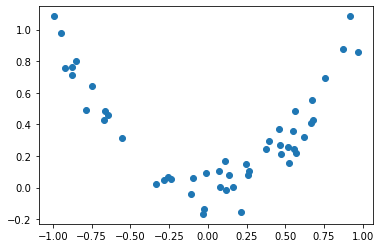

In [15]:
plt.scatter(x,y)

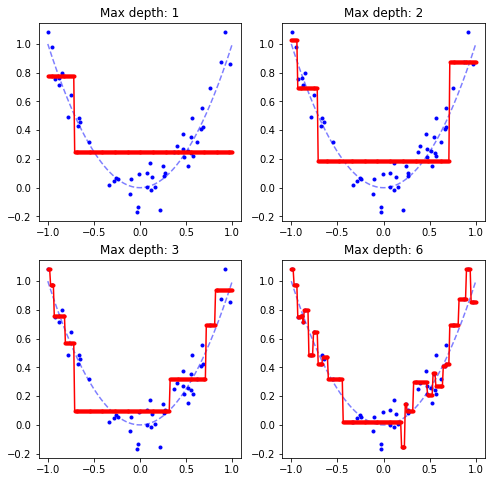

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=1).fit(x[:,None],y[:,None])
x_grid = np.linspace(-1,1,200)

depth = [1,2,3,6]
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()
for i in range(len(axes)):
    tree_reg = DecisionTreeRegressor(max_depth=depth[i])
    tree_reg = tree_reg.fit(x[:,None],y[:,None])
    axes[i].plot(x,y,'b.')
    axes[i].plot(x_grid, x_grid**2, 'b--', alpha=0.5)
    axes[i].plot(x_grid, tree_reg.predict(x_grid[:,None]), 'r.-')
    axes[i].title.set_text(f'Max depth: {depth[i]}')

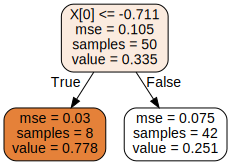

In [40]:
tree_reg2 = DecisionTreeRegressor(max_depth=1).fit(x[:,None],y[:,None])
export_graphviz(
                tree_reg2,
                out_file='tree_reg.dot',
                filled=True,
                rounded=True
                )

Source.from_file('tree_reg.dot', format='png')

In [38]:
a = Source.from_file('tree_reg.dot', format='png')

In [39]:
type(a)

graphviz.files.Source

In [ ]:
a.render()